# Домашнее задание (30 баллов)

* Для задачи 1 используйте данные:[сеть](https://drive.google.com/file/d/1W5GrHAvxG4AjFm6kzwNyzoAA7jt48cJ5/view?usp=sharing), [метки вершин](https://drive.google.com/file/d/1CXh27cW2J5HzmIpqy1PFoeE_Cse7oDPW/view?usp=sharing). 

* Для задачи 2,3 [данные](https://snap.stanford.edu/data/email-Eu-core.html) (предварительно сделайте сеть ненаправленной).

## 1. Классификация вершин (10 баллов) 

Будем решать задачу предсказания влиятельности вершин как задачу классификации. Разобьем отрезок $\left [ s_{i}^{min},s_{i}^{max}\right ]$ на $k$ одинаковых отрезков, и разметим вершины, чьи значения $s_{i}$ лежит в $\left[s_i^{(j-1)},s_i^{(j)} \right)$, $j = 1, 2 \dots k$, меткой $j$, т.е. значение класса $l_i$ для $i$-ой вершины определяется: 

$$
l_i=\left [k \frac{s_i-s_i^{min}}{s_i^{max}-s_i^{min}}\right]. 
$$

Для k=2 задача превращается в задачу бинарной классификации. 

1. Вычислите различные структурные признаки вершин: центральности, кластеризацию, k-core

2.  Исследуйте корреляцию между признаками и целевой переменой 

3. Разделите выборку на обучающую и тестовую, постройте модели классификации (бинарной), выведите метрики качества, подберите оптимальные гиперпараметры

4. Проанализируйте важность признаков 

## 2. Предсказание связей (10 баллов)

1. Разбейте сеть на обучающую и тестовую выборку, тестовая выборка должна содержать как связи, которые нужно предсказать, так и отсутствующие (выберите их случайным образом, чтобы тестовая выборка была сбалансирована). 

2. Сравните Roc-кривые для различных структурных характеристик ребер в сети. Какая лучше справляется с задачей предсказания связей по AUC ROC? 

3. Постройте модель классификации, используя структурные признаки, улучшилось ли качество предсказания?

4. Постройте модель предскзания на основе вложения (используйте вложение сети с помощью Лапласиана или Node2vec, на выбор) Сравните качество предсказания для разных размерностей используемого пространства $d$. 



## 3. Задача кластеризации (10 баллов)

 Каждый сотдрудник относится к одному из департаментов, которые и являются истинными сообществами в сети. 

1. Постройте распределение размеров сообществ в сети, какова доля вершин в наибольшем сообществе? В наименьшем? 

2. Рассмотрим задачу поиска сообществ с помощью агломеративного метода, постройте зависимость метрик качества от числа задаваемых сообществ. 
Какое разбиение оказывается более близким к истинному? 

3. Выполните пункт 2) для алгоритма Гирвана-Ньюмана. Сравните качество агломеративного метода и Гирвана-Ньюмана. 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx 
import pandas as pd
import itertools
import random
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score,confusion_matrix, roc_curve, auc, mutual_info_score
%matplotlib inline

1 задание

In [ ]:
from google.colab import files
files.upload()

Saving ca-GrQc.mtx to ca-GrQc (1).mtx


{'ca-GrQc.mtx': b'19 1\r\n1751 1\r\n2408 1\r\n3078 1\r\n3609 1\r\n3958 1\r\n612 2\r\n2405 2\r\n3096 2\r\n3696 2\r\n222 3\r\n743 3\r\n1829 3\r\n2036 3\r\n2037 3\r\n1742 4\r\n3017 4\r\n3928 4\r\n4043 4\r\n3230 5\r\n98 6\r\n118 6\r\n190 6\r\n251 6\r\n351 6\r\n437 6\r\n471 6\r\n530 6\r\n674 6\r\n675 6\r\n738 6\r\n740 6\r\n1003 6\r\n1065 6\r\n1104 6\r\n1267 6\r\n1420 6\r\n1554 6\r\n1760 6\r\n1784 6\r\n1924 6\r\n1943 6\r\n1974 6\r\n1995 6\r\n2005 6\r\n2212 6\r\n2251 6\r\n2277 6\r\n2387 6\r\n2754 6\r\n2760 6\r\n2954 6\r\n2978 6\r\n2985 6\r\n3075 6\r\n3175 6\r\n3207 6\r\n3284 6\r\n3298 6\r\n3348 6\r\n3388 6\r\n3419 6\r\n3488 6\r\n3614 6\r\n3654 6\r\n3715 6\r\n3952 6\r\n4012 6\r\n4080 6\r\n98 7\r\n118 7\r\n251 7\r\n351 7\r\n437 7\r\n471 7\r\n530 7\r\n674 7\r\n738 7\r\n1003 7\r\n1065 7\r\n1104 7\r\n1267 7\r\n1420 7\r\n1554 7\r\n1760 7\r\n1784 7\r\n1924 7\r\n1943 7\r\n1995 7\r\n2005 7\r\n2212 7\r\n2251 7\r\n2277 7\r\n2387 7\r\n2754 7\r\n2760 7\r\n2985 7\r\n3075 7\r\n3175 7\r\n3207 7\r\n3284 7\r\n

In [ ]:
from google.colab import files
files.upload()

Saving spreading_data_ca-GrQc.csv to spreading_data_ca-GrQc.csv


{'spreading_data_ca-GrQc.csv': b'node,spreading ability\r\n19,0.41414141414141414\r\n1,0.4187109187109187\r\n1751,0.4021164021164021\r\n2408,0.38961038961038963\r\n3078,0.4095719095719096\r\n3609,0.42544492544492546\r\n3958,0.398989898989899\r\n612,0.4208754208754209\r\n2,0.4025974025974026\r\n2405,0.39826839826839827\r\n3096,0.4090909090909091\r\n3696,0.39586339586339586\r\n222,0.40283790283790283\r\n3,0.4004329004329004\r\n743,0.41149591149591147\r\n1829,0.3848003848003848\r\n2036,0.38552188552188554\r\n2037,0.392977392977393\r\n1742,0.4054834054834055\r\n4,0.42857142857142855\r\n3017,0.40596440596440597\r\n3928,0.42953342953342954\r\n4043,0.38792688792688795\r\n3230,0.40644540644540644\r\n5,0.4045214045214045\r\n98,0.41678691678691676\r\n6,0.39634439634439633\r\n118,0.3864838864838865\r\n190,0.38431938431938434\r\n251,0.37999037999038\r\n351,0.41678691678691676\r\n437,0.4175084175084175\r\n471,0.41245791245791247\r\n530,0.4163059163059163\r\n674,0.3903318903318903\r\n675,0.397787397

1.1 Вычислите различные структурные признаки вершин: центральности, кластеризацию, k-core

In [ ]:
G=nx.read_adjlist('ca-GrQc.mtx')
df=pd.read_csv('spreading_data_ca-GrQc.csv').set_index('node')

In [ ]:
cor_n=nx.core_number(G)
val=cor_n.values()
m=max(val)
for i in cor_n.keys():
  cor_n[i]=cor_n[i]/m

In [ ]:
deg_c=pd.DataFrame(nx.degree_centrality(G).items(), columns=['node', 'degree centrality']).astype({'node':np.int64}).set_index('node')
eig_c=pd.DataFrame(nx.eigenvector_centrality(G).items(), columns=['node', 'eigenvector centrality']).astype({'node':np.int64}).set_index('node')
clos_c=pd.DataFrame(nx.closeness_centrality(G).items(), columns=['node', 'closeness centrality']).astype({'node':np.int64}).set_index('node')
bet_c=pd.DataFrame(nx.betweenness_centrality(G).items(), columns=['node', 'betweenness centrality']).astype({'node':np.int64}).set_index('node')
cl=pd.DataFrame(nx.clustering(G).items(), columns=['node', 'clustering']).astype({'node':np.int64}).set_index('node')

In [ ]:
k=2
res={}
for i in df.index:
  t=k*(df.loc[i]['spreading ability']-df['spreading ability'].min())//(df['spreading ability'].max()-df['spreading ability'].min())
  if (t==k):
      t=k-1
  res[i]=t
y=pd.DataFrame(res.items(), columns=['node', 'y']).astype({'node':np.int64}).set_index('node')
cor_n=pd.DataFrame(cor_n.items(), columns=['node', 'k_core']).astype({'node':np.int64}).set_index('node')

In [ ]:
df=df.join(cl).join(deg_c).join(eig_c).join(clos_c).join(bet_c).join(cor_n).join(y)

In [ ]:
df.head()

,spreading ability,clustering,degree centrality,eigenvector centrality,closeness centrality,betweenness centrality,k_core,y
node,,,,,,,,
19,0.414141,0.500000,0.000962,1.978526e-07,0.184101,0.002893,0.069767,1.0
1,0.418711,0.333333,0.001443,1.930278e-08,0.159047,0.002290,0.069767,1.0
1751,0.402116,1.000000,0.000722,1.893130e-08,0.158980,0.000000,0.069767,1.0
2408,0.389610,0.400000,0.001203,5.769050e-07,0.171225,0.001707,0.069767,0.0
3078,0.409572,0.333333,0.000722,1.450752e-08,0.146260,0.000481,0.046512,1.0


1.2 Исследуйте корреляцию между признаками и целевой переменой


In [ ]:
df.corr().style.background_gradient(cmap='Blues')

,spreading ability,clustering,degree centrality,eigenvector centrality,closeness centrality,betweenness centrality,k_core,y
spreading ability,1.000000,-0.004008,0.008903,0.010691,-0.005100,0.023741,0.001065,0.798408
clustering,-0.004008,1.000000,0.051331,0.055931,-0.117046,-0.284538,0.247261,-0.013769
degree centrality,0.008903,0.051331,1.000000,0.600507,0.435221,0.488306,0.899057,0.005637
eigenvector centrality,0.010691,0.055931,0.600507,1.000000,0.275792,0.135088,0.619236,0.014643
closeness centrality,-0.005100,-0.117046,0.435221,0.275792,1.000000,0.473812,0.253214,0.012798
betweenness centrality,0.023741,-0.284538,0.488306,0.135088,0.473812,1.000000,0.134877,0.011934
k_core,0.001065,0.247261,0.899057,0.619236,0.253214,0.134877,1.000000,-0.001162
y,0.798408,-0.013769,0.005637,0.014643,0.012798,0.011934,-0.001162,1.000000


1.3 Разделите выборку на обучающую и тестовую, постройте модели классификации (бинарной), выведите метрики качества, подберите оптимальные гиперпараметры

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [ ]:
X=df.drop(['spreading ability','y'], axis=1)
y=df['y']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
rfc=RandomForestClassifier()
params=[{'n_estimatora_sc': [10, 25, 50, 100],
         'max_depth': [2, 4, 8, 16],
         'criterion':['gini', 'entropy']
}]

In [ ]:
clf=GridSearchCV(rfc, param_grid=params, cv=5, n_jobs=-1, scoring='precision')
best_clf=clf.fit(X_train, y_train)

In [ ]:
best_clf.best_estimator_

RandomForestClassifier(max_depth=8, n_estimators=10)

In [ ]:
y_pred=best_clf.best_estimator_.predict(X_test)

In [ ]:
print("Точность: ", accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1:', f1_score(y_test, y_pred))

Точность:  0.5442307692307692
Precision: 0.5610561056105611
Recall: 0.8717948717948718
F1: 0.6827309236947792


1.4 Проанализируйте важность признаков

In [ ]:
X.columns

Index(['clustering', 'degree centrality', 'eigenvector centrality',
       'closeness centrality', 'betweenness centrality', 'k_core'],
      dtype='object')

In [ ]:
best_clf.best_estimator_.feature_importances_

array([0.13353861, 0.12512198, 0.20881045, 0.28397838, 0.19192503,
       0.05662556])

Наиболее важный это closeness centrality.

2 задание

In [ ]:
from google.colab import files
files.upload()

Saving email-Eu-core.txt to email-Eu-core.txt


{'email-Eu-core.txt': b'0 1\n2 3\n2 4\n5 6\n5 7\n8 9\n10 11\n12 13\n12 14\n15 16\n17 18\n12 19\n20 21\n20 22\n23 24\n23 25\n23 26\n23 27\n23 28\n23 29\n23 30\n23 31\n23 32\n23 33\n23 34\n23 35\n23 36\n23 37\n23 38\n23 39\n23 40\n41 42\n43 44\n45 46\n47 48\n49 50\n41 51\n52 53\n54 55\n54 56\n54 57\n54 58\n54 59\n60 61\n54 54\n62 63\n64 65\n62 4\n66 67\n68 69\n42 41\n70 71\n72 21\n71 70\n73 74\n75 76\n75 48\n77 78\n77 79\n80 81\n80 68\n19 62\n82 83\n22 21\n82 84\n21 72\n41 85\n41 86\n41 87\n82 86\n88 89\n90 91\n92 20\n41 93\n41 94\n41 95\n89 96\n89 88\n97 98\n97 99\n97 100\n97 101\n97 102\n103 104\n51 41\n82 105\n90 106\n62 107\n108 109\n108 66\n108 110\n108 111\n108 112\n113 114\n115 116\n117 118\n76 119\n17 120\n82 121\n122 123\n14 12\n124 125\n13 126\n127 128\n127 129\n127 130\n131 132\n40 26\n40 29\n18 133\n56 55\n56 54\n56 59\n134 6\n115 62\n135 136\n137 138\n137 137\n22 20\n139 140\n141 142\n143 143\n143 51\n143 133\n144 145\n146 147\n83 82\n148 149\n150 103\n150 150\n49 84\n151 28

In [ ]:
from google.colab import files
files.upload()

Saving email-Eu-core-department-labels.txt to email-Eu-core-department-labels.txt


{'email-Eu-core-department-labels.txt': b'0 1\n1 1\n2 21\n3 21\n4 21\n5 25\n6 25\n7 14\n8 14\n9 14\n10 9\n11 14\n12 14\n13 26\n14 4\n15 17\n16 34\n17 1\n18 1\n19 14\n20 9\n21 9\n22 9\n23 11\n24 11\n25 11\n26 11\n27 11\n28 11\n29 11\n30 11\n31 11\n32 11\n33 11\n34 11\n35 11\n36 11\n37 11\n38 11\n39 11\n40 11\n41 5\n42 34\n43 14\n44 14\n45 17\n46 17\n47 10\n48 10\n49 36\n50 37\n51 5\n52 7\n53 4\n54 22\n55 22\n56 21\n57 21\n58 21\n59 21\n60 7\n61 7\n62 36\n63 21\n64 25\n65 4\n66 8\n67 15\n68 15\n69 15\n70 37\n71 37\n72 9\n73 1\n74 1\n75 10\n76 10\n77 3\n78 3\n79 3\n80 29\n81 15\n82 36\n83 36\n84 37\n85 1\n86 36\n87 34\n88 20\n89 20\n90 8\n91 15\n92 9\n93 4\n94 5\n95 4\n96 20\n97 16\n98 16\n99 16\n100 16\n101 16\n102 38\n103 7\n104 7\n105 34\n106 38\n107 36\n108 8\n109 27\n110 8\n111 8\n112 8\n113 10\n114 10\n115 13\n116 13\n117 6\n118 26\n119 10\n120 1\n121 36\n122 0\n123 13\n124 16\n125 16\n126 22\n127 6\n128 5\n129 4\n130 0\n131 28\n132 28\n133 4\n134 2\n135 13\n136 13\n137 21\n138 21\n

In [ ]:
G=nx.read_edgelist('email-Eu-core.txt', delimiter=' ', nodetype= int) 
G = G.to_undirected()
print('Nodes:',G.number_of_nodes()) 
print('Edges:',G.number_of_edges())
print('Density:',nx.density(G)) 

Nodes: 1005
Edges: 16706
Density: 0.03311331787278746


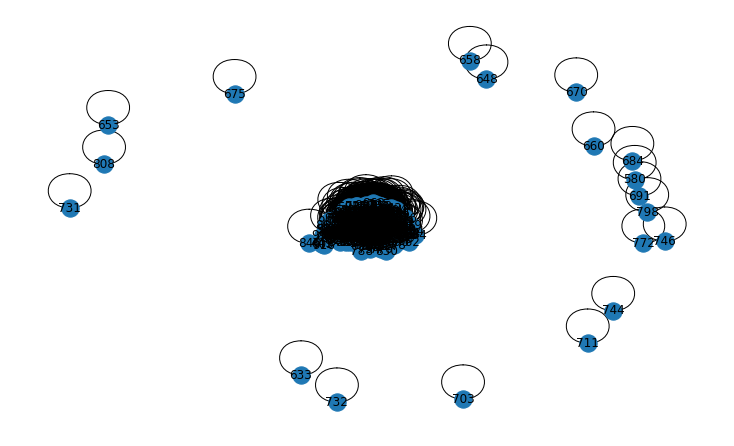

In [ ]:
plt.figure(figsize=(10,6))
pos=nx.spring_layout(G,iterations=50) 
nx.draw(G,pos, with_labels=True)

2.1 Разбейте сеть на обучающую и тестовую выборку, тестовая выборка должна содержать как связи, которые нужно предсказать, так и отсутствующие (выберите их случайным образом, чтобы тестовая выборка была сбалансирована).

In [ ]:
from itertools import combinations

In [ ]:
edge_subset = random.sample(G.edges(), int(0.25 * G.number_of_edges()))

G_train = G.copy()
G_train.remove_edges_from(edge_subset)

In [ ]:
tr_edge_subset = list(G_train.edges())

In [ ]:
no_edge = set(combinations(range(1, G.number_of_nodes() + 1), 2)) -  set(map(lambda x: (int(x[0]), int(x[1])), set(G.edges()))) -  set(map(lambda x: (int(x[1]), int(x[0])), set(G.edges())))

In [ ]:
no_test = list(map(lambda x: (int(x[0]), int(x[1])), random.sample(no_edge, len(edge_subset))))
no_train = list(map(lambda x: (int(x[0]), int(x[1])), random.sample(no_edge - set(no_test), len(tr_edge_subset))))

In [ ]:
test_edges = edge_subset + no_test
train_edges = tr_edge_subset + no_train

In [ ]:
y_t = [1]*len(edge_subset) + [0]*len(no_test)
y_tr = [1]*len(tr_edge_subset) + [0]*len(no_train)

1005 12530


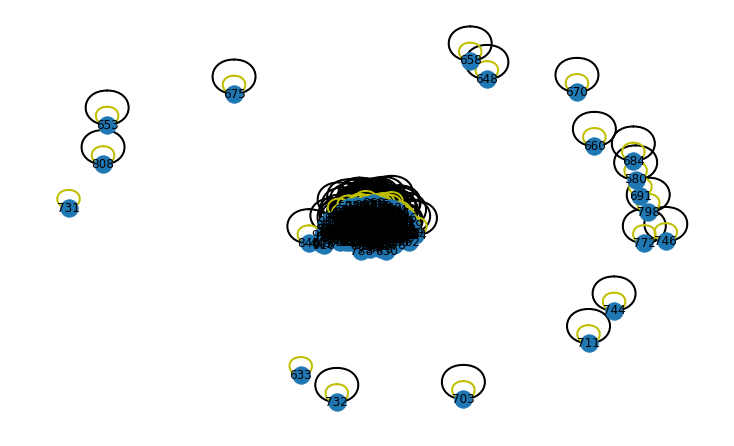

In [ ]:
print(G_train.number_of_nodes(), G_train.number_of_edges())
plt.figure(figsize=(10,6))
nx.draw(G_train, pos, with_labels=True)
nx.draw_networkx_edges(G_train, pos, edge_color = 'k', width = 2)
nx.draw_networkx_edges(G, pos, edgelist = edge_subset, edge_color = 'y', width = 2)

2.2 Сравните Roc-кривые для различных структурных характеристик ребер в сети. Какая лучше справляется с задачей предсказания связей по AUC ROC?

Коэффициент Жаккара

In [ ]:
from sklearn.metrics import roc_curve, auc

In [ ]:
prediction_jaccard = list(nx.jaccard_coefficient(G_train))
scores, y = zip(*[(s, (u,v) in test_edges) for (u,v,s) in prediction_jaccard]) 

Text(0, 0.5, 'True Positive Rate')

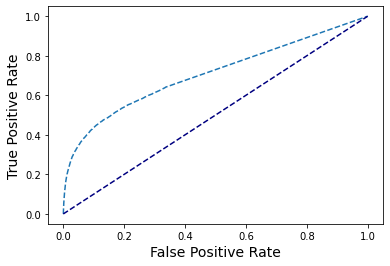

In [ ]:
fpr, tpr, thresholds = roc_curve(y, scores)
plt.plot(fpr, tpr, '--')
plt.plot([0, 1], [0, 1], color="navy",  linestyle="--")
plt.xlabel("False Positive Rate", fontsize=14)
plt.ylabel("True Positive Rate", fontsize=14)

In [ ]:
auc(fpr, tpr)

0.7064386711051412

Коэффициент Адамика-Адара

In [ ]:
prediction_adar = list(nx.adamic_adar_index(G_train))
scores1, y1 = zip(*[(s, (u,v) in test_edges) for (u,v,s) in prediction_adar]) 

Text(0, 0.5, 'True Positive Rate')

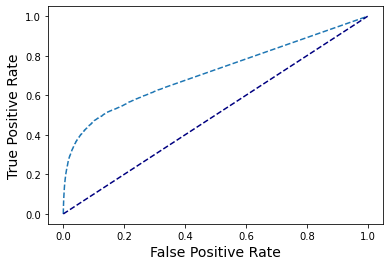

In [ ]:
fpr1, tpr1, thresholds = roc_curve(y1, scores1)
plt.plot(fpr1, tpr1, '--')
plt.plot([0, 1], [0, 1], color="navy",  linestyle="--")
plt.xlabel("False Positive Rate", fontsize=14)
plt.ylabel("True Positive Rate", fontsize=14)

In [ ]:
auc(fpr1, tpr1)

0.7135309479958014

Коэффициент предпочтительного присоединения


In [ ]:
prediction_pref = list(nx.preferential_attachment(G_train))
scores2, y2 = zip(*[(s, (u,v) in test_edges) for (u,v,s) in prediction_pref]) 

Text(0, 0.5, 'True Positive Rate')

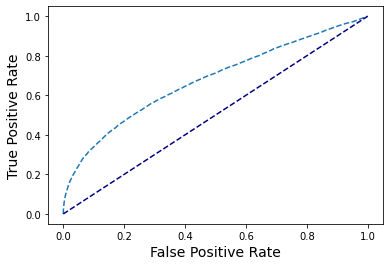

In [ ]:
fpr2, tpr2, thresholds = roc_curve(y2, scores2)
plt.plot(fpr2, tpr2, '--')
plt.plot([0, 1], [0, 1], color="navy",  linestyle="--")
plt.xlabel("False Positive Rate", fontsize=14)
plt.ylabel("True Positive Rate", fontsize=14)

In [ ]:
auc(fpr2, tpr2)

0.6760930518388311

Text(0, 0.5, 'True Positive Rate')

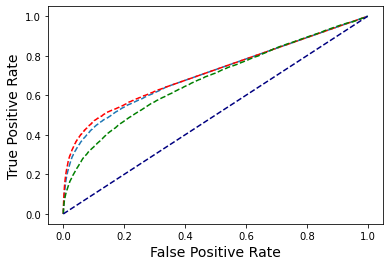

In [ ]:
plt.plot(fpr, tpr, '--')
plt.plot(fpr1, tpr1, '--', color="r")
plt.plot(fpr2, tpr2, '--', color="g")
plt.plot([0, 1], [0, 1], color="navy",  linestyle="--")
plt.xlabel("False Positive Rate", fontsize=14)
plt.ylabel("True Positive Rate", fontsize=14)

С задачей предсказания лучше справляется коэффицент Адамика-Адара, что следует и из графиков, и из величины AUC


2.3 Постройте модель классификации, используя структурные признаки, улучшилось ли качество предсказания?

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
X=list(zip(scores, scores1, scores2))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pr=clf.predict_proba(X_test)[:,1]
fpr3, tpr3, thresholds = roc_curve(y_test, y_pr)
auc(fpr3, tpr3)

0.702645235752898

Качество предсказания уступает предсказанию с коэффицентом Адамика-Адара из пункта 2.2

2.4 Постройте модель предсказания на основе вложения (используйте вложение сети с помощью Лапласиана или Node2vec, на выбор) Сравните качество предсказания для разных размерностей используемого пространства  d .

In [ ]:
from sklearn.manifold import spectral_embedding

for d in range(1,5):
  print("d=",d)
  a=nx.to_numpy_array(G_train)
  emb = spectral_embedding(a, n_components=d, norm_laplacian=True, random_state=0)
  sigm = []
  cosm = []
  for u,v in test_edges:
      vec1 = emb[int(u)-1, :]
      vec2 = emb[int(v)-1, :]
      sigm.append(1 / (1 + np.exp(-np.dot(vec1, vec2))))
      cosm.append(np.dot(vec1, vec2) / (np.sum(vec1**2) * np.sum(vec2**2)))
  fpr4, tpr4, thresholds = roc_curve(y_t, sigm)
  print("Сигмоида=", auc(fpr4, tpr4))
  fpr5, tpr5, thresholds = roc_curve(y_t, cosm)
  print("Косинусная мера=", auc(fpr5, tpr5))    

d= 1


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_spectral_embedding.py:261: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  "Graph is not fully connected, spectral embedding may not work as expected."


Сигмоида= 0.5318551100706831
Косинусная мера= 0.5460013248484314
d= 2


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_spectral_embedding.py:261: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  "Graph is not fully connected, spectral embedding may not work as expected."


Сигмоида= 0.5498184927830625
Косинусная мера= 0.5366990011340116
d= 3


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_spectral_embedding.py:261: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  "Graph is not fully connected, spectral embedding may not work as expected."


Сигмоида= 0.5576503173122092
Косинусная мера= 0.5354778285147018
d= 4


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_spectral_embedding.py:261: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  "Graph is not fully connected, spectral embedding may not work as expected."


Сигмоида= 0.5594046634389542
Косинусная мера= 0.5440418061243963



При d=1 качество предсказания наилучшее по косинусной мере, а при d=4 по сигмоиде
.

3 задание


3.1 Постройте распределение размеров сообществ в сети, какова доля вершин в наибольшем сообществе? В наименьшем?

Доля вершин в наименьшем  0.001
Доля вершин в наибольшем  0.108


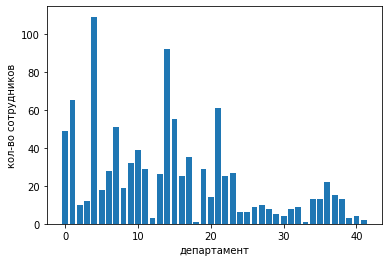

In [ ]:
data = pd.read_csv('email-Eu-core-department-labels.txt', names=['em','dpr'], sep = ' ')
df = data.groupby('dpr').count()
plt.bar(df.reset_index()['dpr'], df.reset_index()['em'])
plt.xlabel('департамент')
plt.ylabel('кол-во сотрудников');
print("Доля вершин в наименьшем ",round(float(df.min())/data.shape[0],3))
print("Доля вершин в наибольшем ",round(float(df.max())/data.shape[0],3))

3.2 Рассмотрим задачу поиска сообществ с помощью агломеративного метода, постройте зависимость метрик качества от числа задаваемых сообществ. Какое разбиение оказывается более близким к истинному?

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.cluster import adjusted_rand_score, rand_score, normalized_mutual_info_score

def similarity_matrix(G, nodelist=None): # nodelist задает порядок строк в матрице
    if (nodelist is None):
        nodelist=list(G.nodes)

    Smatrix=np.zeros((len(nodelist), len(nodelist)))

    for i, node1 in enumerate(nodelist):
        for j, node2 in enumerate(nodelist[i+1:], start = i+1):
            Smatrix[i,j]=(len(set(G[node1]) & set(G[node2])) + int(G.has_edge(node1,node2)))/(np.min([len(G[node1]),len(G[node2])])
                                                                                          +1-int(G.has_edge(node1,node2)))
            Smatrix[j,i]=Smatrix[i,j]

    return Smatrix

In [ ]:
X=similarity_matrix(G,nodelist=None)
y_true = np.array(data['dpr']).astype('int')

In [ ]:
nmut_is = []
ra_sc = []
for i in range(2, 50, 5):
  comm = AgglomerativeClustering(linkage='average', n_clusters = i)
  comm.fit(X)
  y_pred=comm.labels_
  nmut_is.append(normalized_mutual_info_score(y_true, y_pred))
  ra_sc.append(rand_score(y_true, y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/cluster/_agglomerative.py:542: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)
/usr/local/lib/python3.7/dist-packages/sklearn/cluster/_agglomerative.py:542: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)
/usr/local/lib/python3.7/dist-packages/sklearn/cluster/_agglomerative.py:542: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  out = hierarchy.linkage(X, method=linkage, metric=affinity)
/usr/local/lib/python3.7/dist-packages/sklearn/cluster/_agglomerative.py:542: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix l

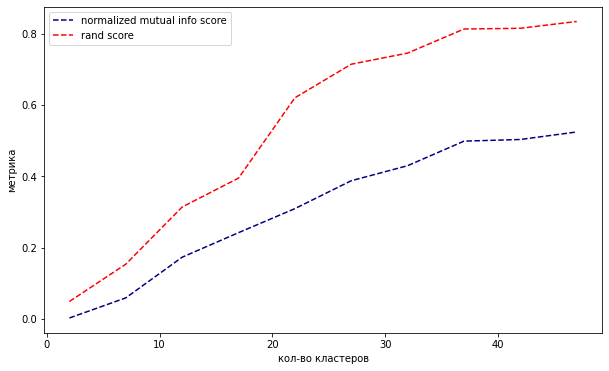

In [ ]:
plt.figure(figsize = (10,6))
plt.plot(range(2, 50, 5), nmut_is, label = 'normalized mutual info score', color="navy",  linestyle="--")
plt.plot(range(2, 50, 5), ra_sc, label = 'rand score', color="r",  linestyle="--")
plt.xlabel('кол-во кластеров')
plt.ylabel('метрика')
plt.legend()

Примерно после 40 кластера прекращается улучшение качества модели, наиулушчая метрика - rand score


3.3 Выполните пункт 2) для алгоритма Гирвана-Ньюмана. Сравните качество агломеративного метода и Гирвана-Ньюмана.

In [ ]:
from networkx.algorithms import community as com
comps=com.girvan_newman(G)
lim = itertools.takewhile(lambda c: len(c) <= 50, comps)

In [ ]:
nmut_is1 = []
ra_sc1 = []
cls = []
y_true = np.array(y_true).astype('int')
for comm in lim:
  l=list(sorted(c) for c in comm)
  cls.append(len(l))
  y_pred1=[]
  for node in G.nodes():
    for i in range(len(l)):
      if node in l[i]:
        y_pred1.append(i)
  nmut_is1.append(normalized_mutual_info_score(y_true, y_pred1))
  ra_sc1.append(rand_score(y_true, y_pred1))

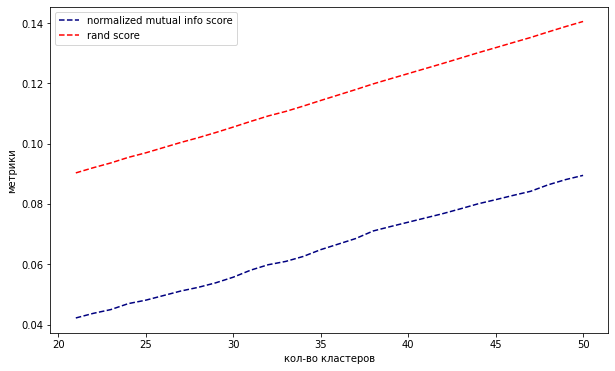

In [ ]:
plt.figure(figsize = (10,6))
plt.plot(cls, nmut_is1, label = 'normalized mutual info score', color="navy",  linestyle="--")
plt.plot(cls, ra_sc1, label = 'rand score', color="r",  linestyle="--")
plt.xlabel('кол-во кластеров')
plt.ylabel('метрики')
plt.legend()